In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv(r"C:\Users\LAURA\Downloads\vehicle_emissions_data.csv")

In [12]:
df.head()

,distance_value,vehicle_make,vehicle_model,vehicle_year,vehicle_model_id,distance_unit,estimated_at,carbon_g,carbon_lb,carbon_kg,carbon_mt
0,100.0,Toyota,Corolla,2020,55a2a50b-cc69-4de3-a413-34ca2977e4a6,km,2024-10-26T13:58:46.234Z,15969,35.21,15.97,0.02
1,100.0,Toyota,Corolla Hybrid,2020,d4100062-de61-43d1-846b-ff3c6427c2bc,km,2024-10-26T13:58:46.416Z,10563,23.29,10.56,0.01
2,100.0,Toyota,Corolla,2020,5df1b6cf-eb3e-45fe-9d76-3694db08dde0,km,2024-10-26T13:58:46.584Z,17211,37.95,17.21,0.02
3,100.0,Toyota,Corolla XSE,2020,4f3ea2cf-7721-4d75-84c8-d542034fc94b,km,2024-10-26T13:58:46.900Z,16466,36.30,16.47,0.02
4,100.0,Toyota,Corolla,2020,3524e8ea-78d4-45f5-9a7c-dd05d2141f24,km,2024-10-26T13:58:47.245Z,16590,36.58,16.59,0.02


In [32]:
brands = df['vehicle_make'].unique()
print(brands)

['Toyota' 'Ford' 'Hyundai' 'Lamborghini' 'Tesla']


In [106]:
marcas = df.groupby('vehicle_make')['carbon_kg'].mean().sort_values(ascending=False)
print(marcas)

vehicle_make
Lamborghini    54.845
Ford           32.394
Toyota         23.627
Hyundai        15.841
Tesla           0.000
Name: carbon_kg, dtype: float64


C:\Users\LAURA\AppData\Local\Temp\ipykernel_14092\1552115950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marcas.index, y=marcas.values, palette='Set1')


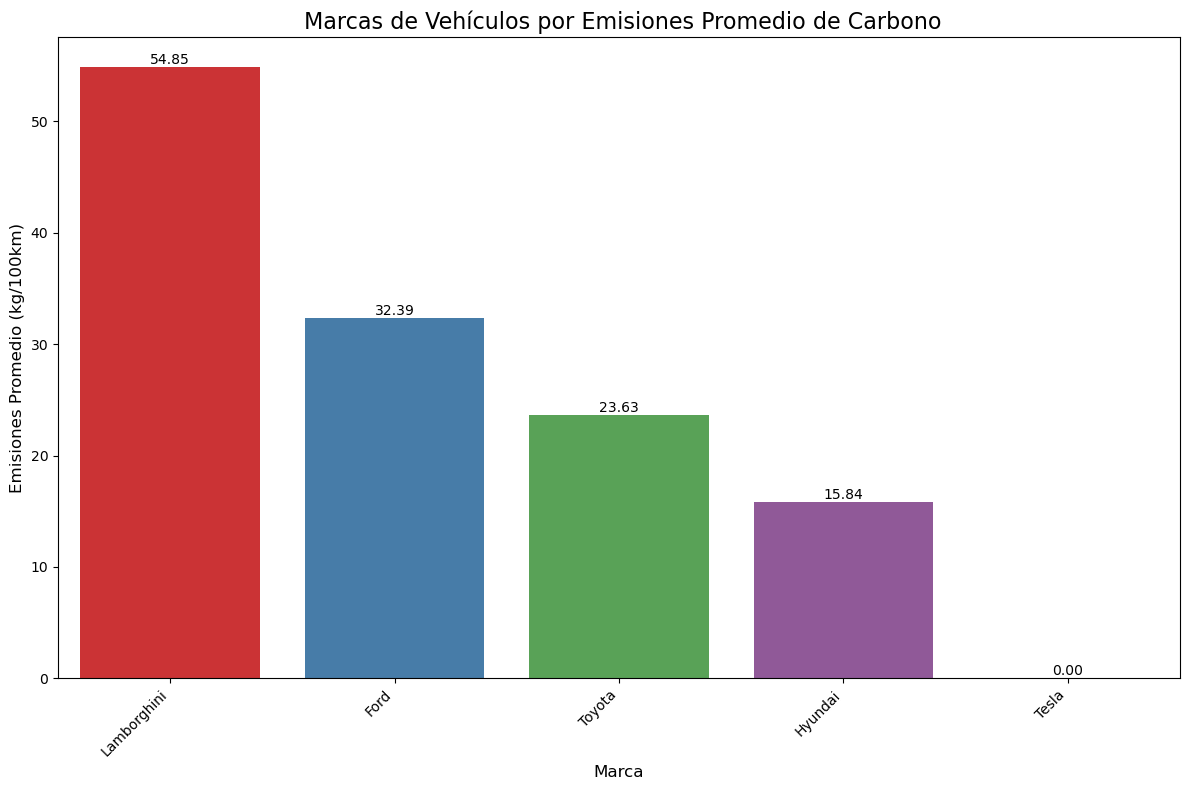

In [158]:
plt.figure(figsize=(12, 8))
sns.barplot(x=marcas.index, y=marcas.values, palette='Set1')

plt.title(f' Marcas de Vehículos por Emisiones Promedio de Carbono', fontsize=16)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Emisiones Promedio (kg/100km)', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(marcas.values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [110]:
modelos = df.groupby('vehicle_model')['carbon_kg'].mean().sort_values(ascending=False)
print(modelos)

vehicle_model
Countach                         78.890000
Land Cruiser Wagon 4WD           50.200000
Countach Lp500s                  50.200000
Aventador Roadster               50.080000
Aventador Coupe                  48.900000
E150 Club Wagon                  42.530000
Urus                             38.340000
Huracan                          37.030000
Huracan Spyder                   37.030000
4Runner 4WD                      27.680000
Van 2WD                          26.955000
Transit Connect Van 2WD          23.300000
Excel                            22.125000
Transit Connect Van FFV          21.930000
Pony Excel                       21.566667
Transit Connect Wagon LWB FFV    21.380000
Transit Connect Wagon LWB FWD    21.380000
Corolla                          16.590000
Corolla XSE                      16.470000
Sonata Hybrid                    11.740000
Sonata Hybrid Blue               10.690000
Corolla Hybrid                   10.560000
Ioniq Plug-in Hybrid              4.6000

In [78]:
estadisticas = (df.groupby(['vehicle_make', 'vehicle_year'])['carbon_kg']
                  .mean()
                  .reset_index()
                  .sort_values(['carbon_kg'], ascending=[False]))
print(estadisticas)

   vehicle_make  vehicle_year  carbon_kg
7   Lamborghini          1986  78.890000
8   Lamborghini          1987  78.890000
9   Lamborghini          1988  78.890000
6   Lamborghini          1984  50.200000
0          Ford          1985  42.530000
10  Lamborghini          2020  42.276000
12       Toyota          1985  31.894000
1          Ford          2020  22.258000
3       Hyundai          1987  22.125000
2       Hyundai          1986  21.566667
13       Toyota          2020  15.360000
5       Hyundai          2021  11.215000
4       Hyundai          2020   9.010000
11        Tesla          2020   0.000000


In [80]:
df_nuevos = df[df['vehicle_year'] >= 2020]

emisiones_nuevos = (df_nuevos.groupby(['vehicle_make', 'vehicle_model'])['carbon_kg']
                         .value_counts()
                         .sort_values(ascending=False)
                         .reset_index())

print(emisiones_nuevos)

   vehicle_make                  vehicle_model  carbon_kg  count
0       Hyundai                  Sonata Hybrid      11.74      2
1       Hyundai             Sonata Hybrid Blue      10.69      2
2          Ford        Transit Connect Van 2WD      21.93      1
3         Tesla             Model 3 Long Range       0.00      1
4        Toyota                 Corolla Hybrid      10.56      1
5        Toyota                        Corolla      17.21      1
6        Toyota                        Corolla      16.59      1
7        Toyota                        Corolla      15.97      1
8         Tesla    Model 3 Standard Range Plus       0.00      1
9         Tesla         Model 3 Standard Range       0.00      1
10        Tesla              Model 3 Mid Range       0.00      1
11        Tesla         Model 3 Long Range AWD       0.00      1
12  Lamborghini                 Huracan Spyder      37.03      1
13  Lamborghini                           Urus      38.34      1
14         Ford        Tr

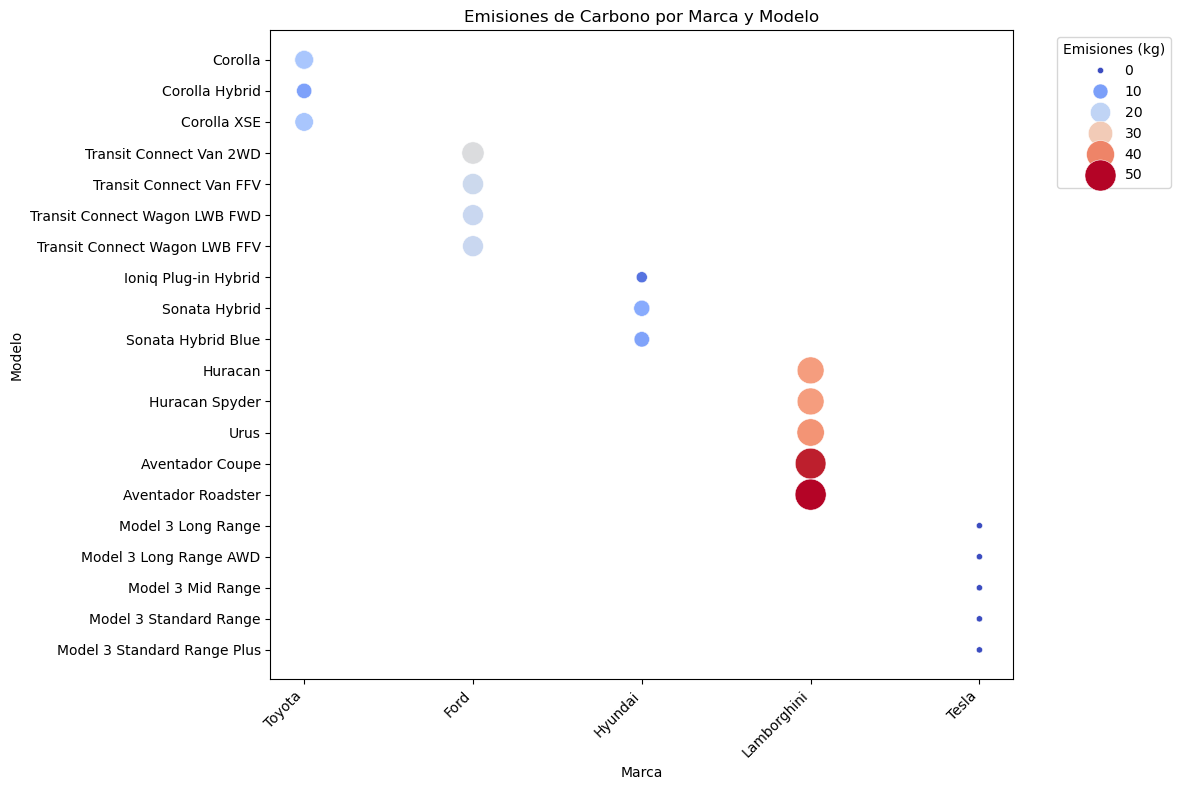

In [140]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='vehicle_make', y='vehicle_model', size='carbon_kg', hue='carbon_kg', data=df_nuevos, sizes=(20, 500), palette='coolwarm')
plt.title('Emisiones de Carbono por Marca y Modelo')
plt.xlabel('Marca')
plt.ylabel('Modelo')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Emisiones (kg)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

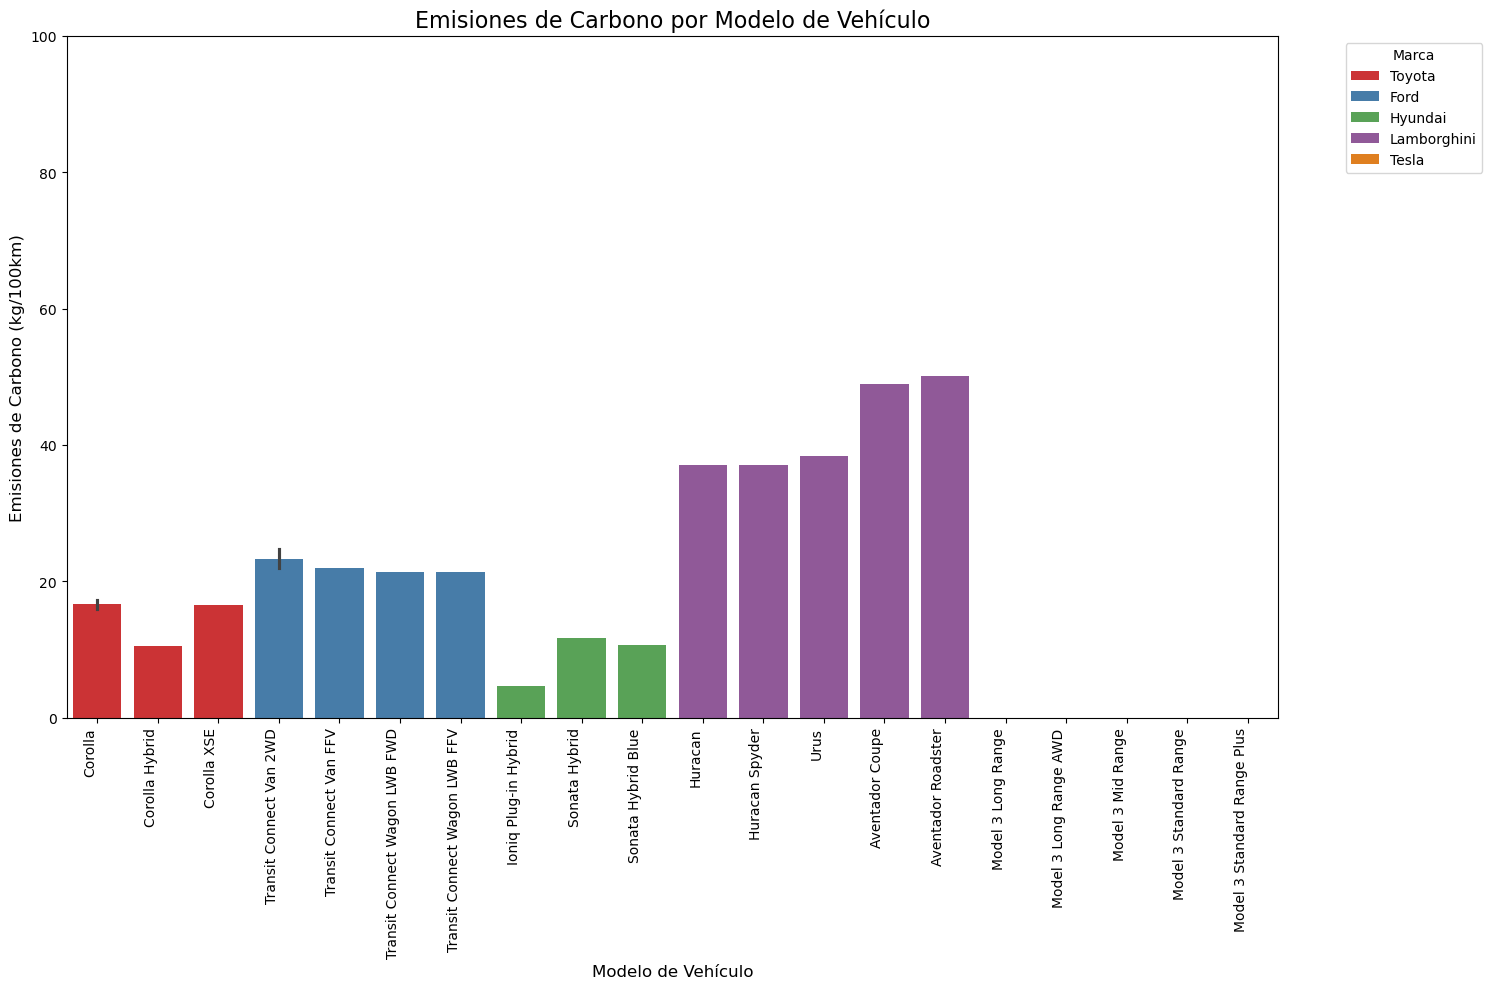

In [156]:
plt.figure(figsize=(15, 10))
sns.barplot(x='vehicle_model', y='carbon_kg', hue='vehicle_make', data=df_nuevos, dodge=False, palette='Set1')
plt.title('Emisiones de Carbono por Modelo de Vehículo', fontsize=16)
plt.xlabel('Modelo de Vehículo', fontsize=12)
plt.ylabel('Emisiones de Carbono (kg/100km)', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [94]:
df_viejos = df[df['vehicle_year'] < 2020]

emisiones_viejos = (df_viejos.groupby(['vehicle_make', 'vehicle_model'])['carbon_kg']
                         .value_counts()
                         .sort_values(ascending=False)
                         .reset_index())

print(emisiones_viejos)

   vehicle_make           vehicle_model  carbon_kg  count
0   Lamborghini                Countach      78.89      3
1   Lamborghini         Countach Lp500s      50.20      2
2          Ford         E150 Club Wagon      34.51      1
3       Hyundai              Pony Excel      23.01      1
4        Toyota                 Van 2WD      26.30      1
5        Toyota  Land Cruiser Wagon 4WD      50.20      1
6        Toyota             4Runner 4WD      29.06      1
7        Toyota             4Runner 4WD      26.30      1
8       Hyundai              Pony Excel      21.24      1
9          Ford         E150 Club Wagon      39.44      1
10      Hyundai              Pony Excel      20.45      1
11      Hyundai                   Excel      23.01      1
12      Hyundai                   Excel      21.24      1
13         Ford         E150 Club Wagon      50.20      1
14         Ford         E150 Club Wagon      46.02      1
15         Ford         E150 Club Wagon      42.48      1
16       Toyot

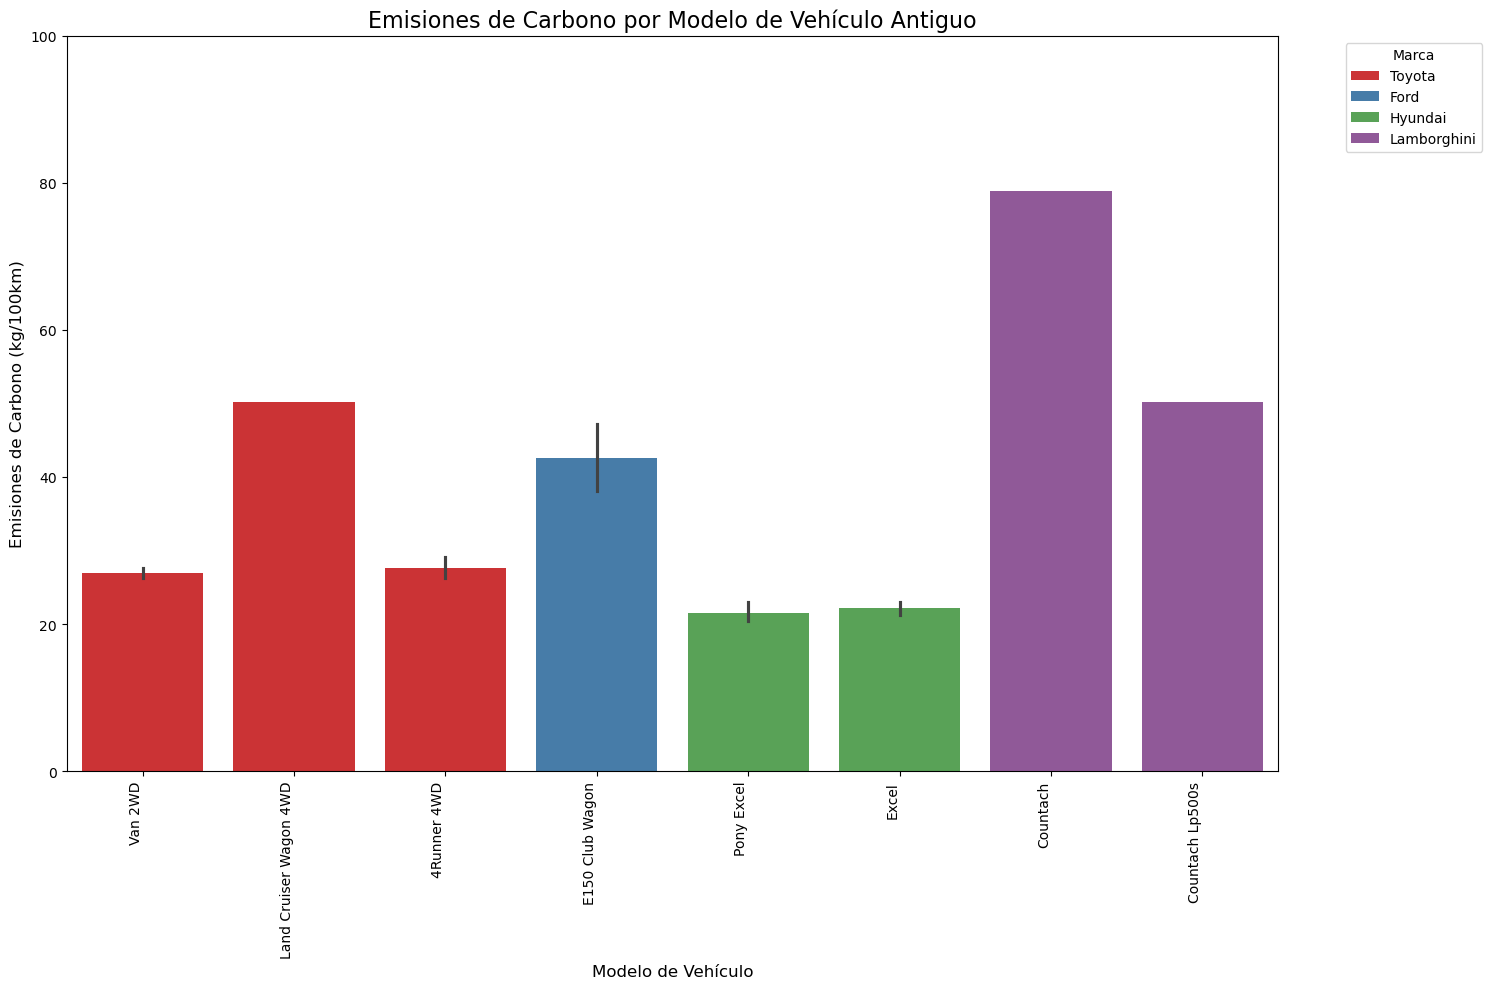

In [154]:
plt.figure(figsize=(15, 10))
sns.barplot(x='vehicle_model', y='carbon_kg', hue='vehicle_make', data=df_viejos, dodge=False, palette='Set1')
plt.title('Emisiones de Carbono por Modelo de Vehículo Antiguo', fontsize=16)
plt.xlabel('Modelo de Vehículo', fontsize=12)
plt.ylabel('Emisiones de Carbono (kg/100km)', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()